# Introduction

This is my try to do the data exploration of the kick off ANN

# Libraries

In [37]:
# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model
from functions import *
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# Loading the data

In [28]:
df = pd.read_csv('data.csv', sep=';')
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


# Exploration of the data

In [29]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [30]:
df.shape

(4424, 37)

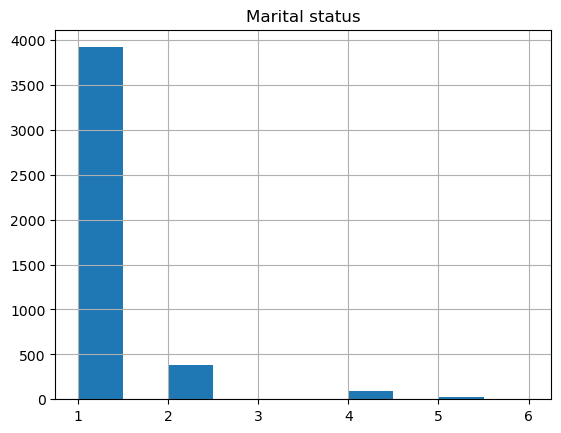

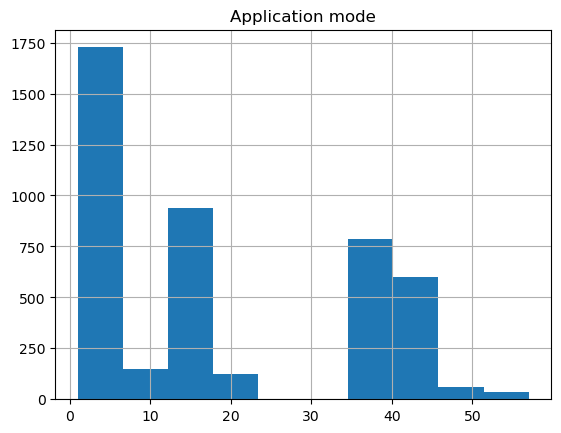

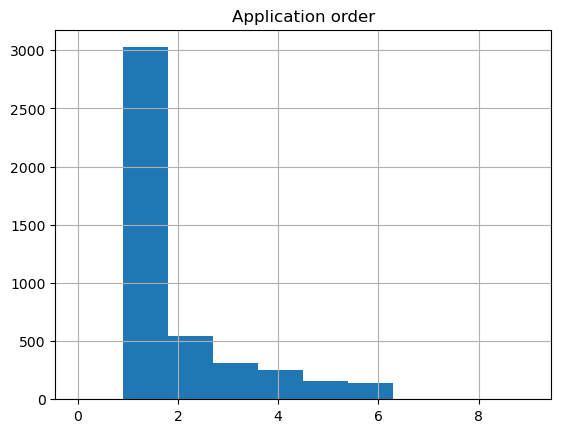

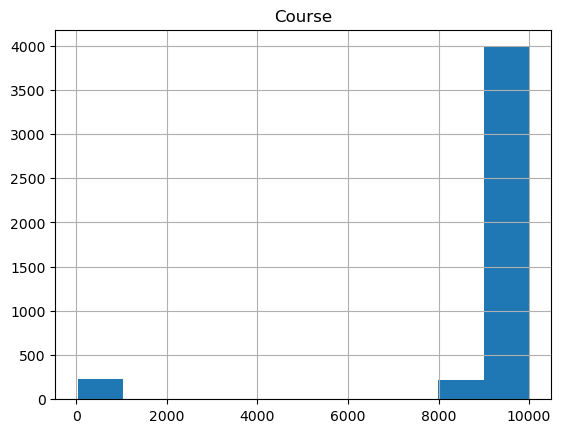

c:\Users\tanjo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


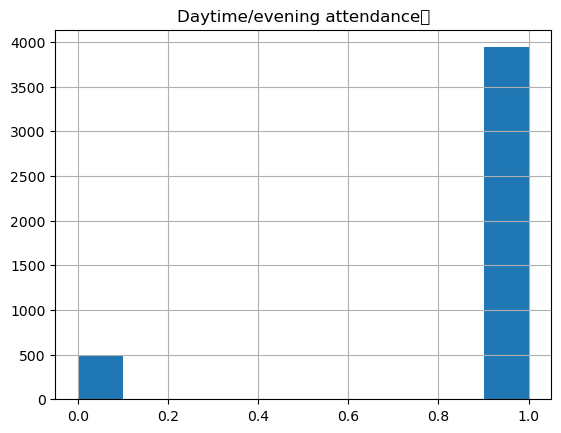

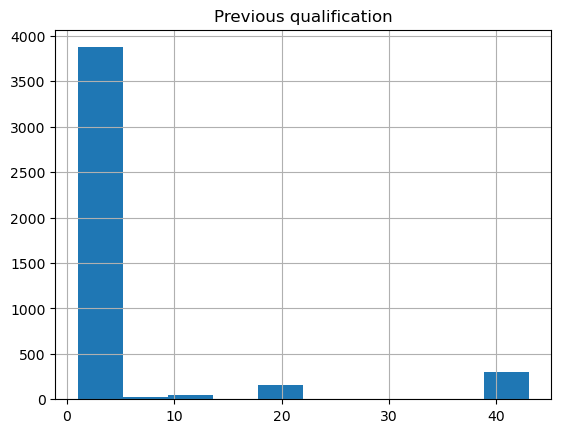

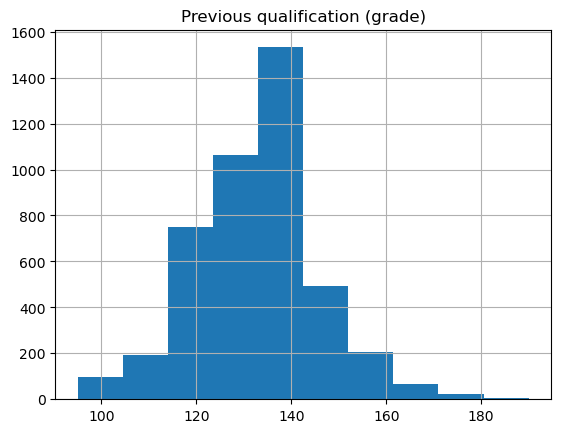

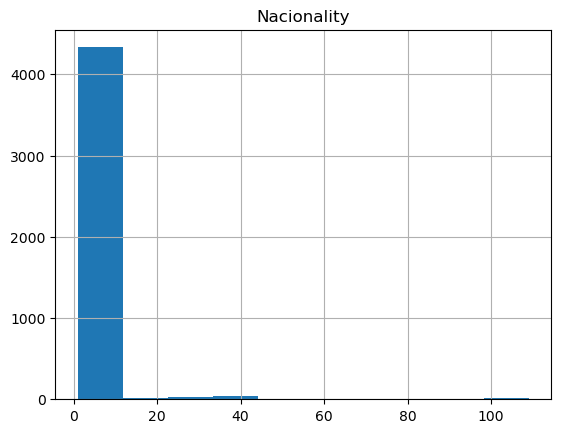

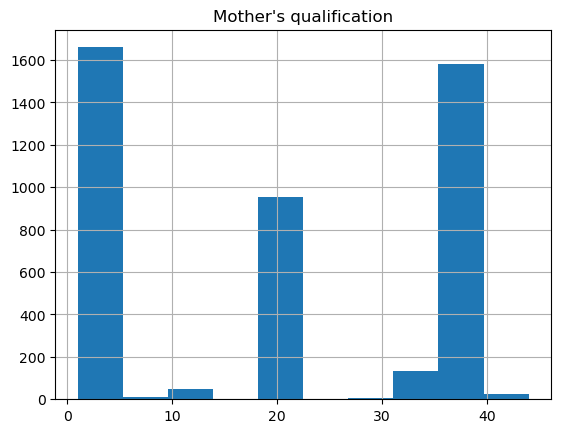

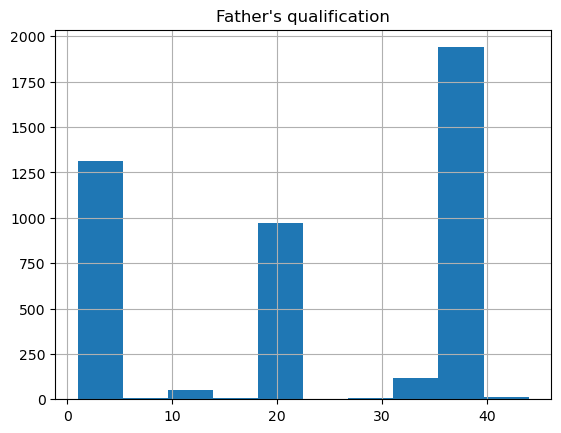

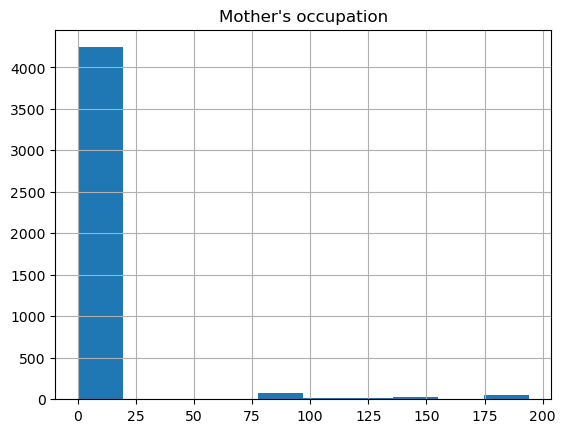

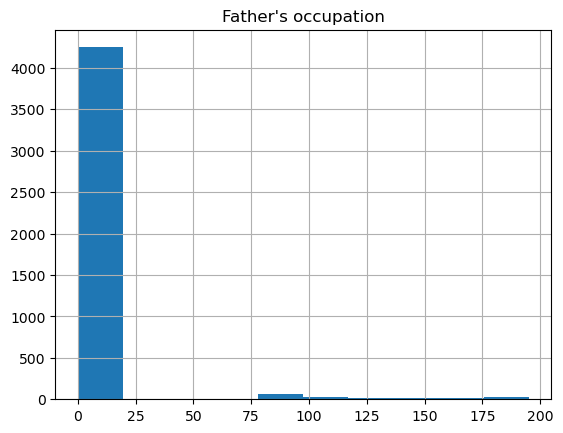

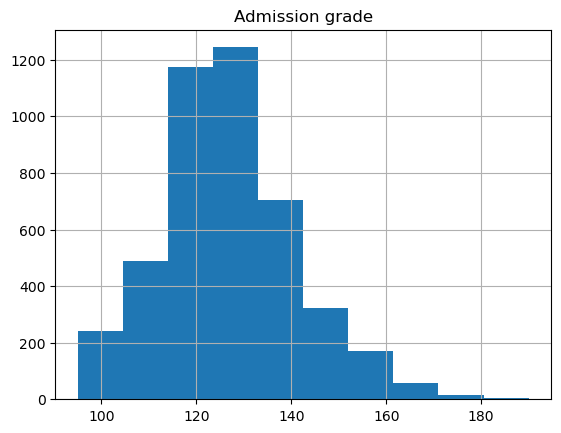

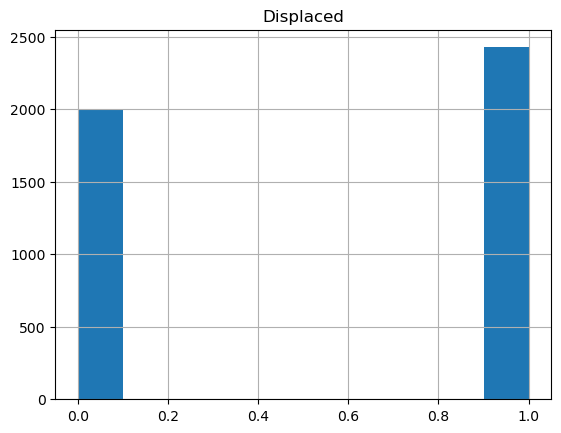

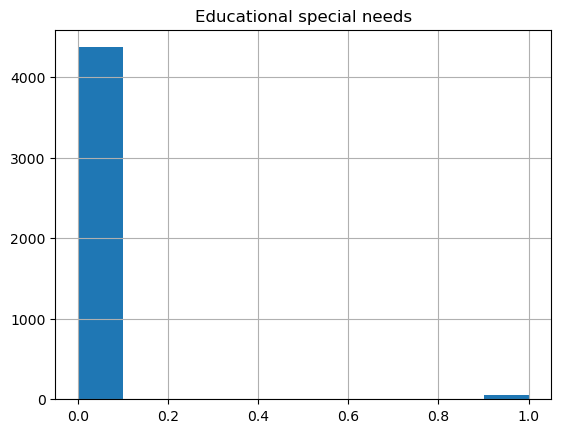

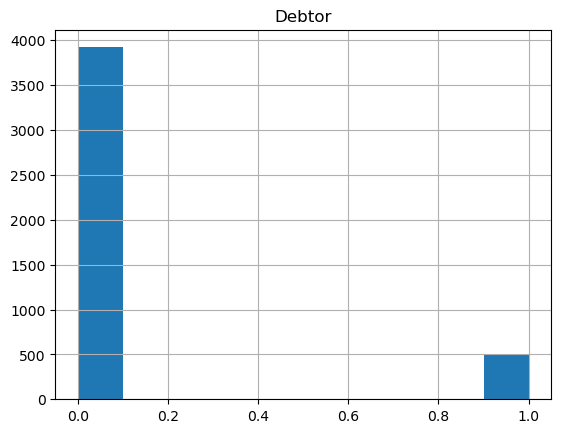

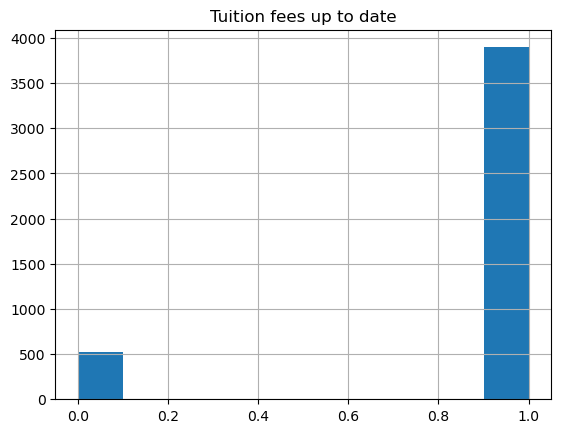

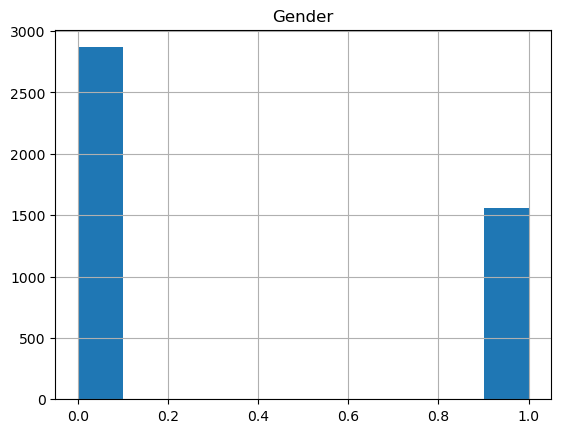

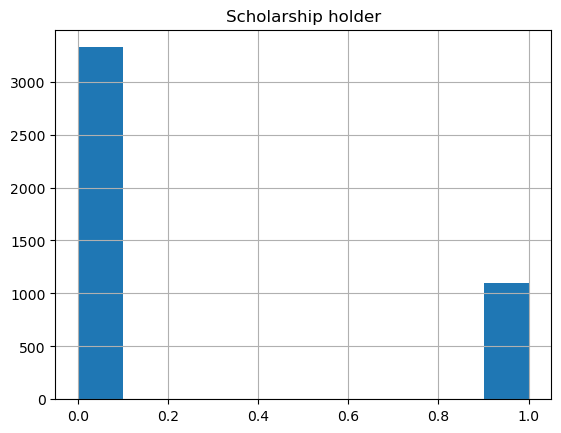

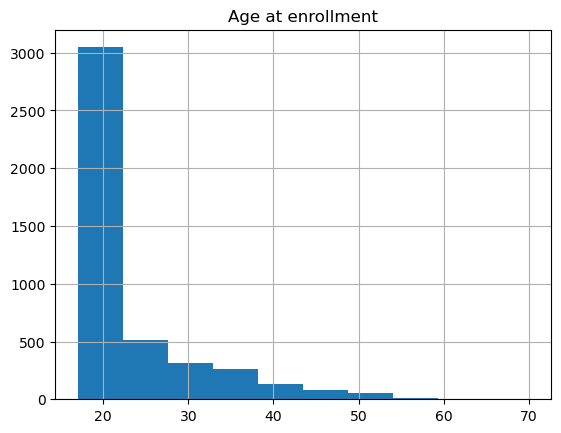

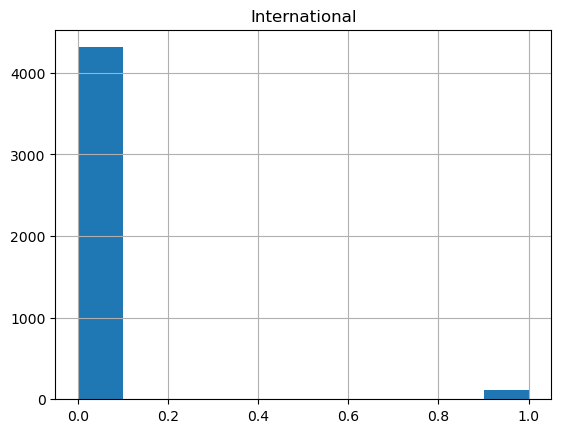

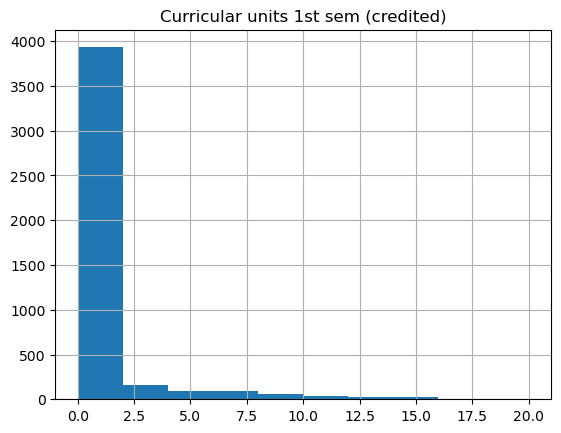

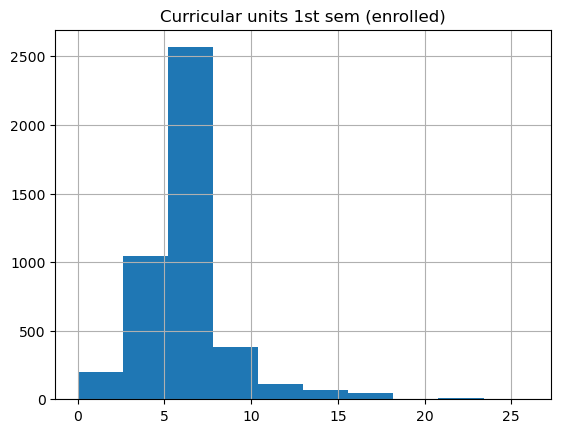

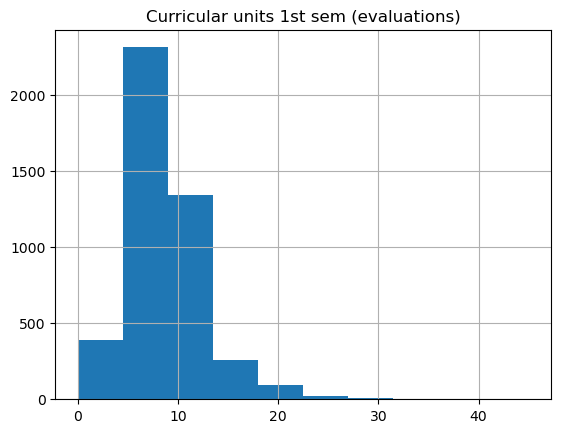

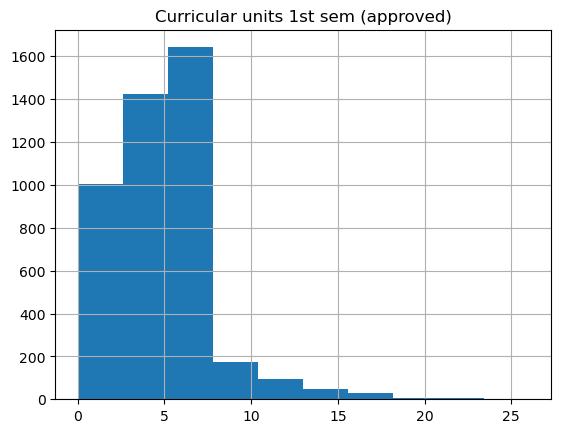

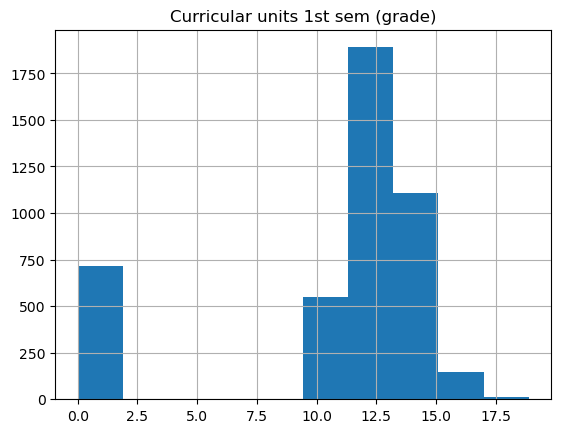

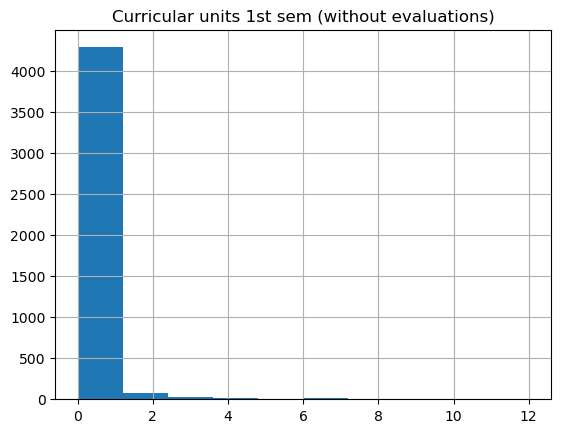

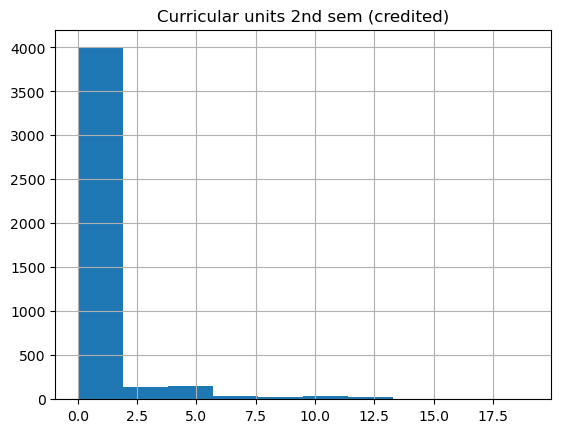

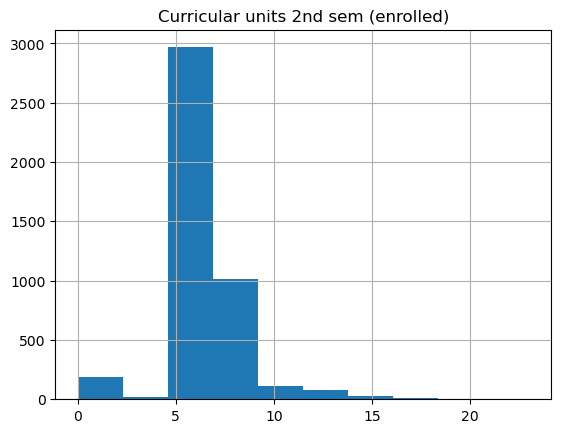

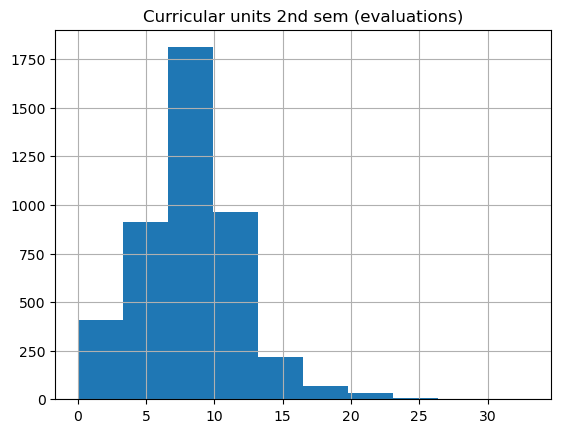

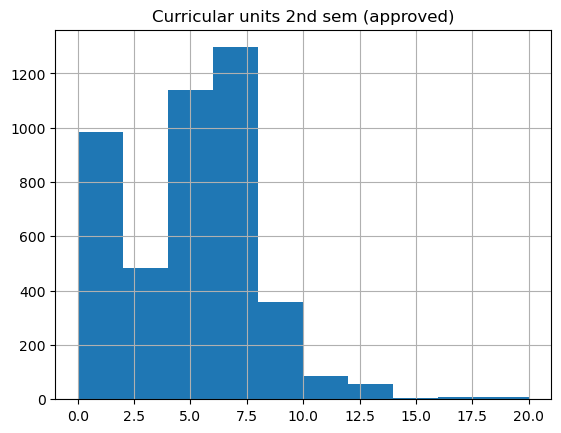

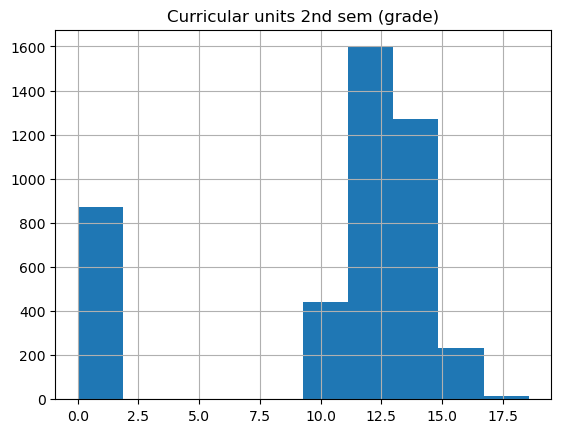

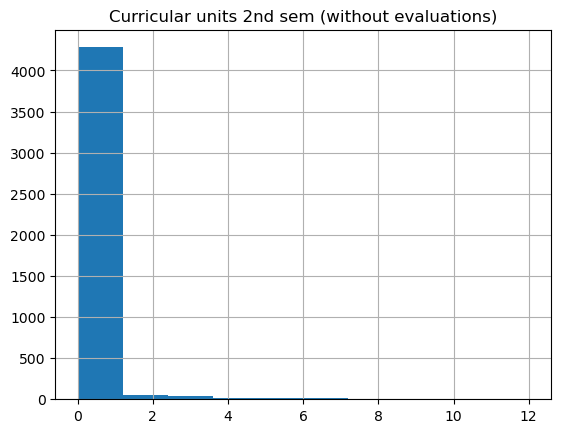

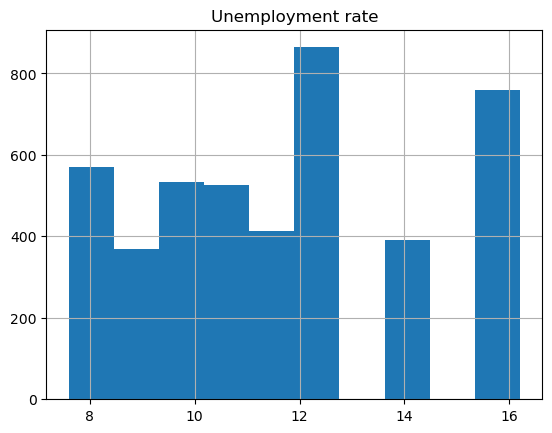

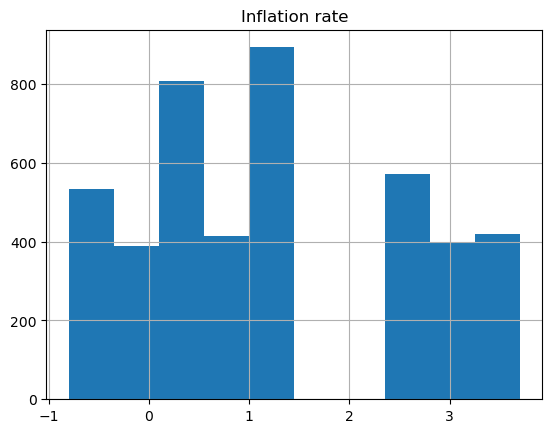

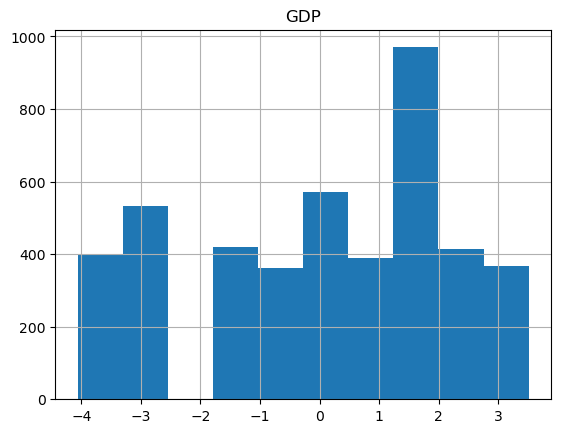

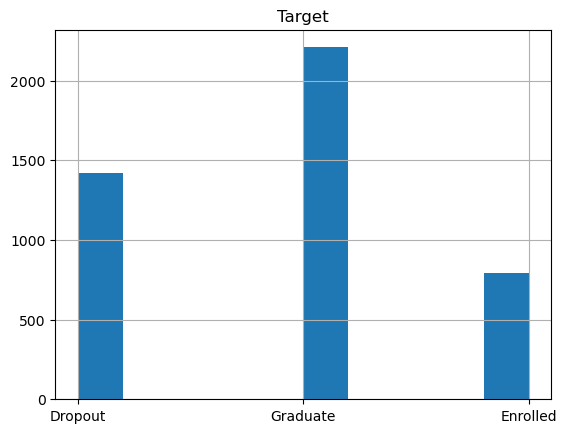

In [31]:
# Show the distribution of each columns in a different plot each
for col in df.columns:
    plt.figure()
    df[col].hist()
    plt.title(col)
    plt.show()

### Remarks:
There is a different types of features.  
There is a categorical data: Target, Martial status, Application mode, Application order, Course, Daytime/evening attendance, Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Displaced, Education special needs, Debtor, tuition fees up to date, Gender, Scholarship holder, International

As we are want to predict the Dropout and the Graduate, The enrolled target should be removed. And use to predict them for the futur.

## Preparing the Data

In [32]:
print(f'Au début on a {df.shape[0]} lignes')
df_enrolled = df[df['Target'] == 'Enrolled']
print(f'Après avoir filtré les lignes avec Target=Enrolled, il reste {df_enrolled.shape[0]} lignes')
df = df[df['Target'] != 'Enrolled']
print(f'Après avoir filtré les lignes avec Target=Enrolled, il reste {df.shape[0]} lignes')

Au début on a 4424 lignes
Après avoir filtré les lignes avec Target=Enrolled, il reste 794 lignes
Après avoir filtré les lignes avec Target=Enrolled, il reste 3630 lignes


# Prediction

## Preparing the data for the training

In [46]:
# Selecting the target
y = df['Target']
# Change it to binary
y = y.apply(lambda x: 1 if x == 'Graduate' else 0)

# Selecting the features
X = df.drop(columns=['Target'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Preparing the model for the training

In [47]:
# All the parameters for the model
input_dim = len(df.columns) # Number of input features
layers = [32, 12, 10] # The last one is the number of output classes
activations = ['relu', 'relu', 'sigmoid']

# Create the model
model = KerasModel.build_model(input_dim)


NameError: name 'Sequential' is not defined